In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

file_path = "ENB2012_data.xlsx"
data = pd.read_excel(file_path)

data.columns = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
    'Heating_Load', 'Cooling_Load'
]

print(data.head())

   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling_Load  
0         21.33  
1         21.33  
2         21.33  
3         21.3

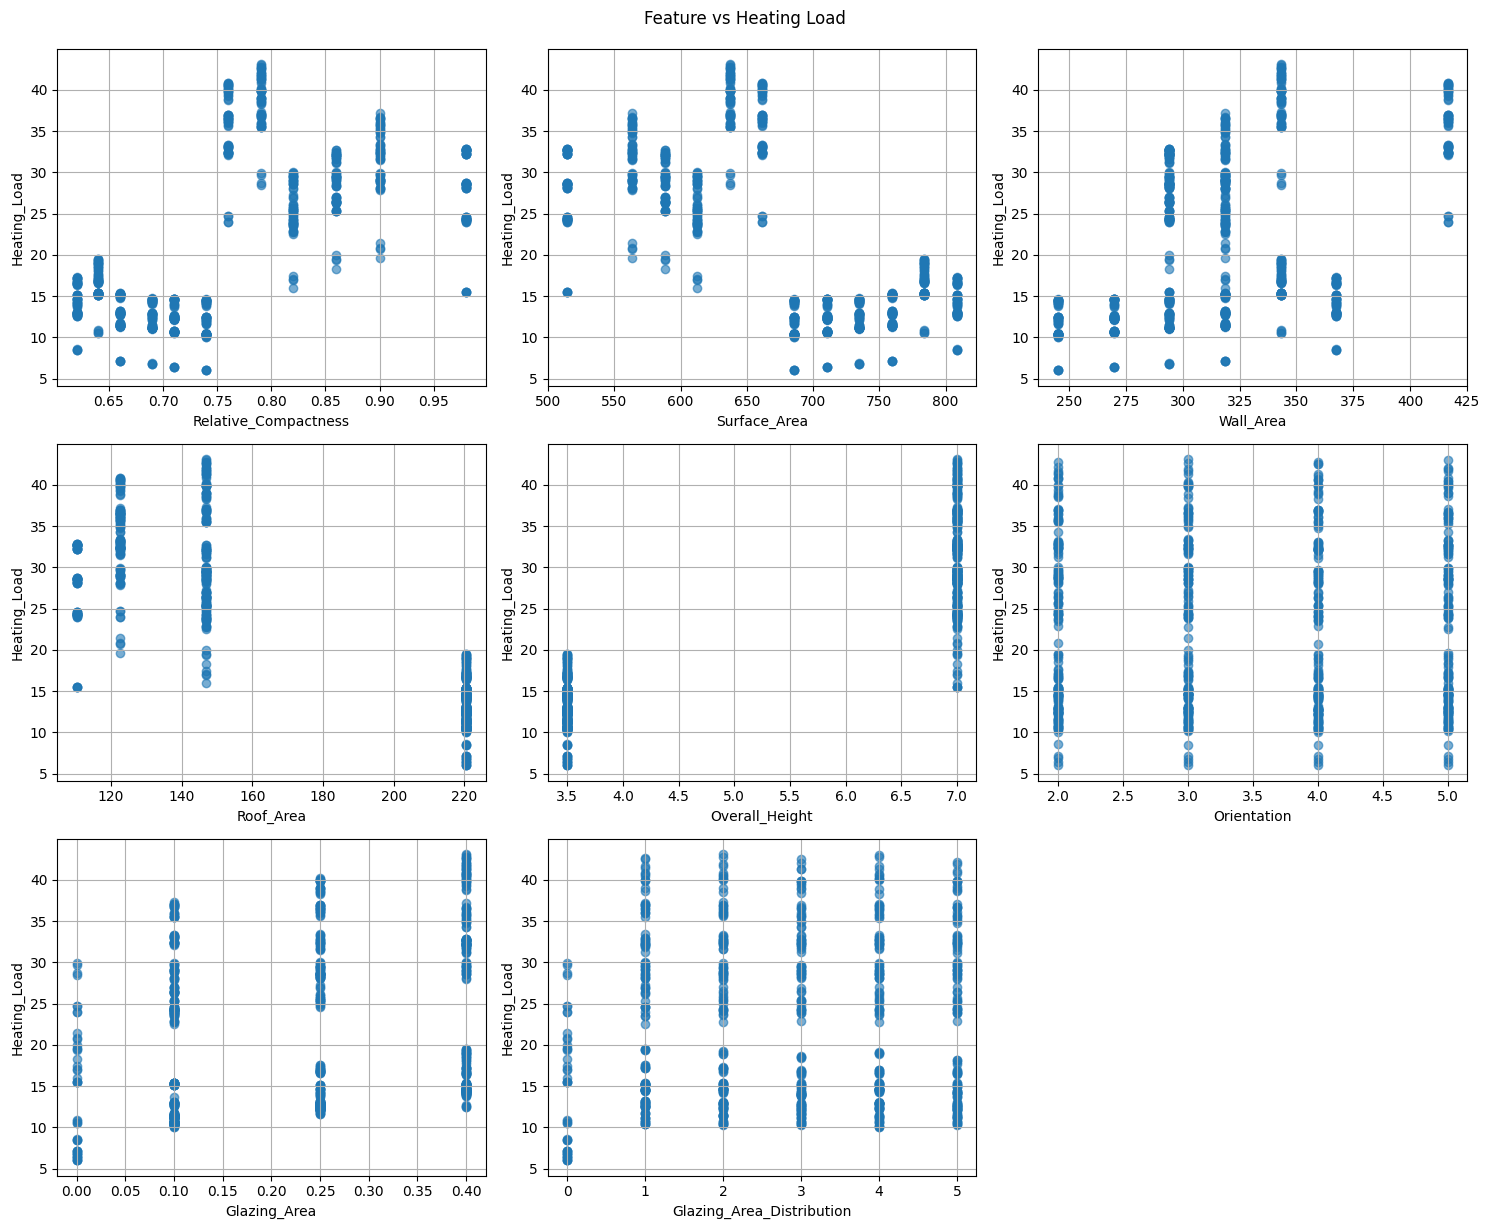

In [ ]:
features = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution'
]
target = 'Heating_Load'

plt.figure(figsize=(15, 12))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    plt.scatter(data[feature], data[target], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Feature vs Heating Load', y=1.02)
plt.show()


In [ ]:
import numpy as np

# Compute correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Display correlation with Heating Load
print("Correlation with Heating Load:")
print(corr_matrix['Heating_Load'].sort_values(ascending=False))


Correlation with Heating Load:
Heating_Load                 1.000000
Cooling_Load                 0.975862
Overall_Height               0.889430
Relative_Compactness         0.622272
Wall_Area                    0.455671
Glazing_Area                 0.269842
Glazing_Area_Distribution    0.087368
Orientation                 -0.002587
Surface_Area                -0.658120
Roof_Area                   -0.861828
Name: Heating_Load, dtype: float64


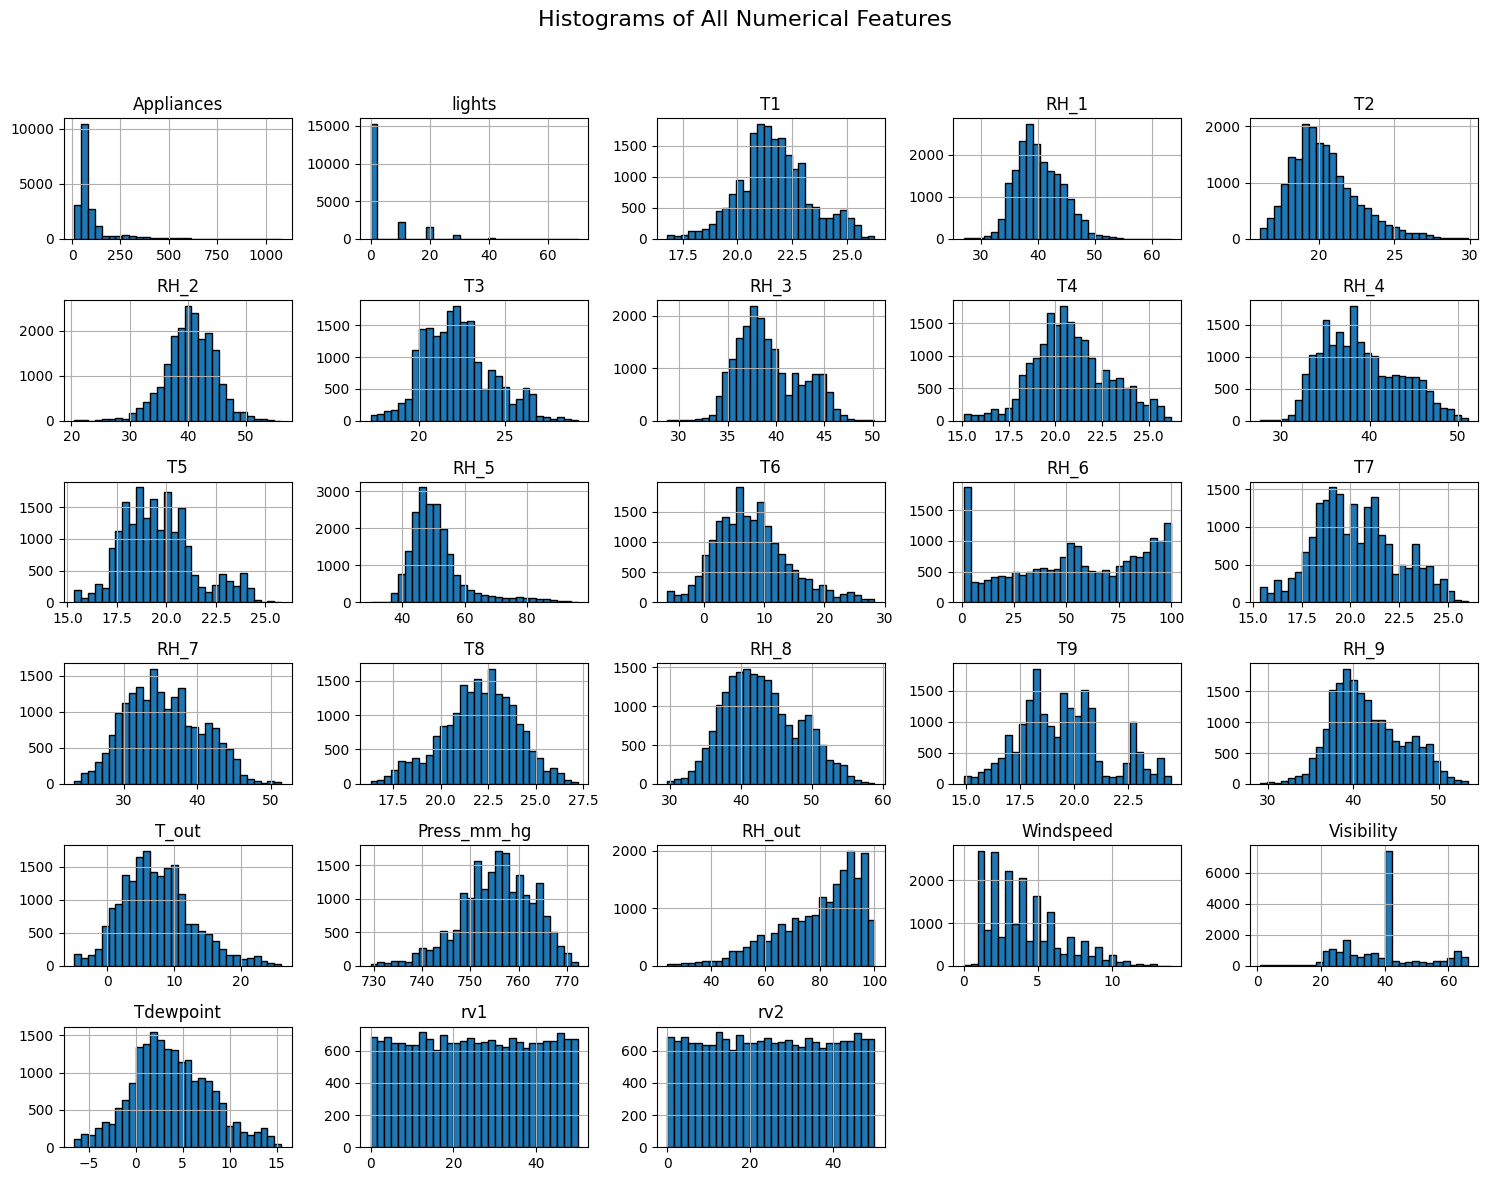

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/energydata_complete.csv')

# Plot histograms for all numerical columns
data.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of All Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


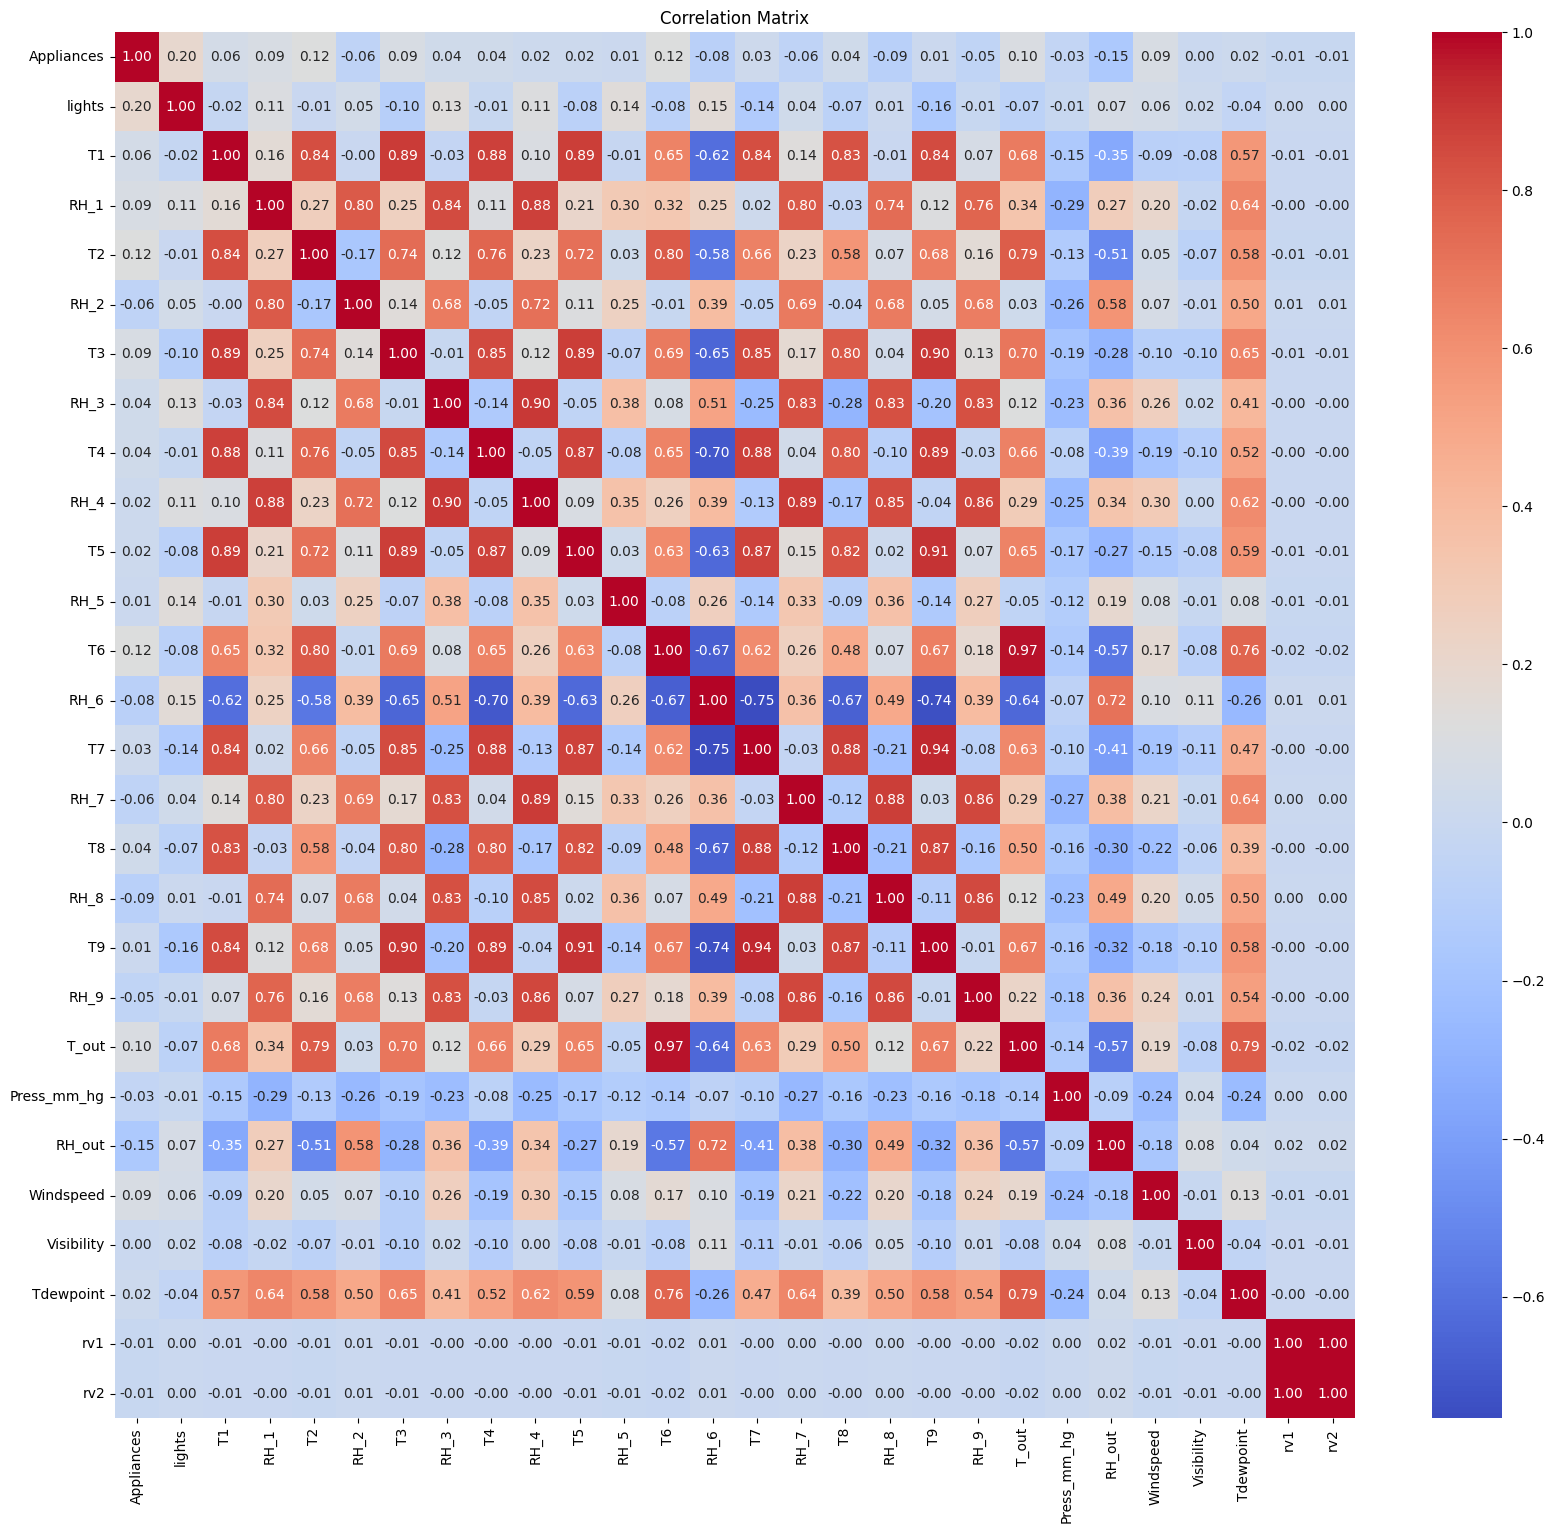

In [ ]:
plt.figure(figsize=(20, 18))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

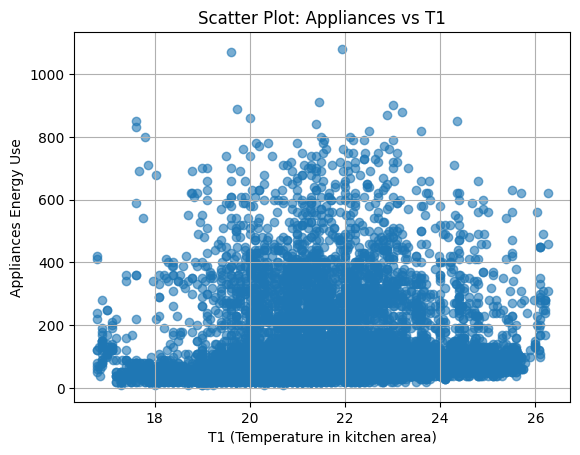

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['T1'], data['Appliances'], alpha=0.6)
plt.xlabel('T1 (Temperature in kitchen area)')
plt.ylabel('Appliances Energy Use')
plt.title('Scatter Plot: Appliances vs T1')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin

In [ ]:
class LinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        beta = np.linalg.pinv(X).dot(y)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]
        return self

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [ ]:
data.isnull().sum()

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


In [ ]:
X = data.drop(columns=['Appliances' , 'date'])
y = data['Appliances']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
model.coef_

array([ 1.85266998e+00,  1.01278512e+00,  1.59624076e+01, -1.93171951e+01,
       -1.39963568e+01,  2.49751603e+01,  4.67098583e+00, -2.88405521e+00,
        6.49660595e-02, -4.33788890e-01,  1.94506612e-01,  7.23720473e+00,
        2.32886109e-01,  1.90523989e+00, -1.56635940e+00,  8.47697978e+00,
       -4.76158613e+00, -1.64861134e+01, -8.56130086e-01, -9.99360704e+00,
        8.36291990e-02, -9.55899181e-01,  1.74906386e+00,  1.50608348e-01,
        4.55348935e+00, -2.09972649e-02, -2.09972649e-02])

In [ ]:
model.intercept_

np.float64(80.83446573508135)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}\n")

MAE: 53.26
MSE: 9261.42
RMSE: 96.24
R²: 0.16



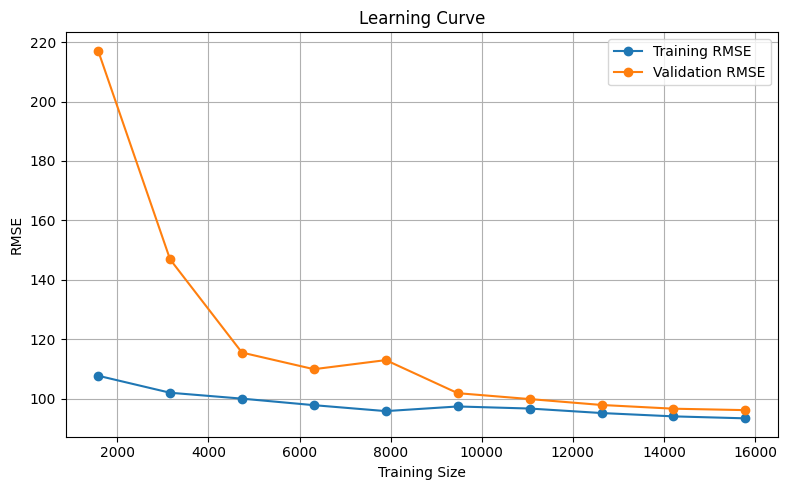

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5,
                                                        scoring='neg_mean_squared_error',
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse.mean(axis=1), 'o-', label='Training RMSE')
plt.plot(train_sizes, test_rmse.mean(axis=1), 'o-', label='Validation RMSE')
plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

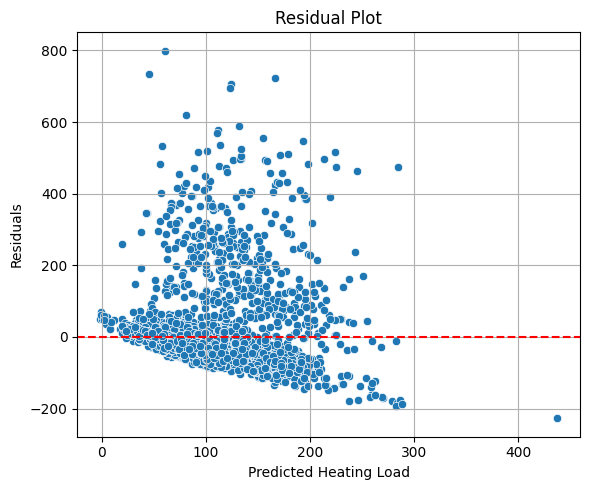

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Heating Load")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

LinearRegression()

In [ ]:
y_poly_test_pred = poly_model.predict(X_poly_test)

In [ ]:
model.coef_

array([ 1.85266998e+00,  1.01278512e+00,  1.59624076e+01, -1.93171951e+01,
       -1.39963568e+01,  2.49751603e+01,  4.67098583e+00, -2.88405521e+00,
        6.49660595e-02, -4.33788890e-01,  1.94506612e-01,  7.23720473e+00,
        2.32886109e-01,  1.90523989e+00, -1.56635940e+00,  8.47697978e+00,
       -4.76158613e+00, -1.64861134e+01, -8.56130086e-01, -9.99360704e+00,
        8.36291990e-02, -9.55899181e-01,  1.74906386e+00,  1.50608348e-01,
        4.55348935e+00, -2.09972649e-02, -2.09972649e-02])

In [ ]:
model.intercept_

np.float64(80.83446573508135)

In [ ]:
mae = mean_absolute_error(y_test, y_poly_test_pred)
mse = mean_squared_error(y_test, y_poly_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_poly_test_pred)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}\n")

MAE: 50.53
MSE: 7905.01
RMSE: 88.91
R²: 0.28



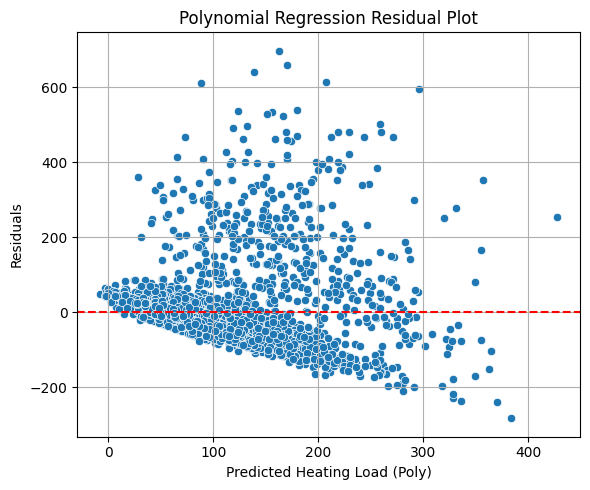

In [ ]:
residuals_poly = y_test - y_poly_test_pred
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_poly_test_pred, y=residuals_poly)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Heating Load (Poly)")
plt.ylabel("Residuals")
plt.title("Polynomial Regression Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

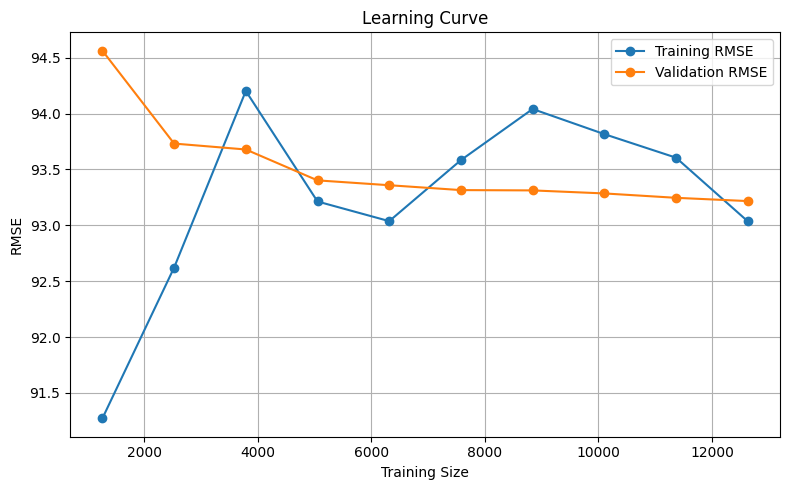

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    poly_model, X_train, y_train, cv=5,
    scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse.mean(axis=1), 'o-', label='Training RMSE')
plt.plot(train_sizes, test_rmse.mean(axis=1), 'o-', label='Validation RMSE')
plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()